**Importing the Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

**Data Collection & Analysis**

In [2]:
customer_data = pd.read_csv('Mall_Customers.csv')  # Read the csv file 

In [4]:
customer_data  # Display the customer dataframe

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


**Insights: There are 200 rows of customer date and 5 columns**

In [5]:
customer_data.shape  # View the shape of the customer data

(200, 5)

**Insights: No null data**

In [9]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
customer_data.isnull().sum()  # No null data

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

**Inspect for duplicates**

In [7]:
customer_data.duplicated().sum() # No duplicate data

0

In [8]:
#check for the duplicates that might be present
customer_data[customer_data.duplicated()]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)


In [9]:
customer_data.drop_duplicates(inplace = True)  #Code to drop the duplicated rows. There are no duplicates in this data so we did not need to drop duplicates

### Machine Learning Process

**Choosing the Annual Income Column & Spending Score column for Input**

In [10]:
X = customer_data.iloc[:, 3:5].values

In [11]:
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

### Choosing the number of clusters

**WCSS  means  Within Clusters Sum of Squares. It helps to choose how many clusters are there in our dataset.**

In [12]:
import warnings
warnings.filterwarnings('ignore')

>Compute the WCSS m starting from K = 2 to K = 10, using the For loop.

In [13]:
wcss = []

for i in range(2,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(X)  #make the clusters on the given data
    wcss.append(kmeans.inertia_)

In [19]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(X)
    
    wcss.append(kmeans.inertia_)

>Inspect the computed WCSS values

In [23]:
wcss

[181363.59595959593,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37265.86520484347,
 30273.394312070042,
 24986.52564064288,
 21838.863692828912,
 19646.482018947238]

In [15]:
sns.set()  #set the default style of all the further plots to be of seaborn style

>## Strategies to Determine Optimal K ##
Domain Knowledge and Business Context:

Use domain knowledge or the specific requirements of the problem to guide the choice of K.
For example, if you are clustering customers, you might know from business context that there are typically around a certain number of customer segments.
Silhouette Score Analysis:

Compute the silhouette score for each value of K and choose the K that maximizes the silhouette score. The silhouette score measures how similar an object is to its own cluster compared to other clusters.
Higher silhouette scores indicate better-defined clusters.
Gap Statistic:

The gap statistic compares the total within intra-cluster variation for different numbers of clusters with their expected values under null reference distribution of the data.
Practicality and Simplicity:

Sometimes simpler models with fewer clusters are preferred for interpretability and practical implementation.

>Extend the elbow method with silhouette score analysis to determine the optimal K:<br>
>Look for the K with the highest silhouette score. This indicates better-defined clusters.


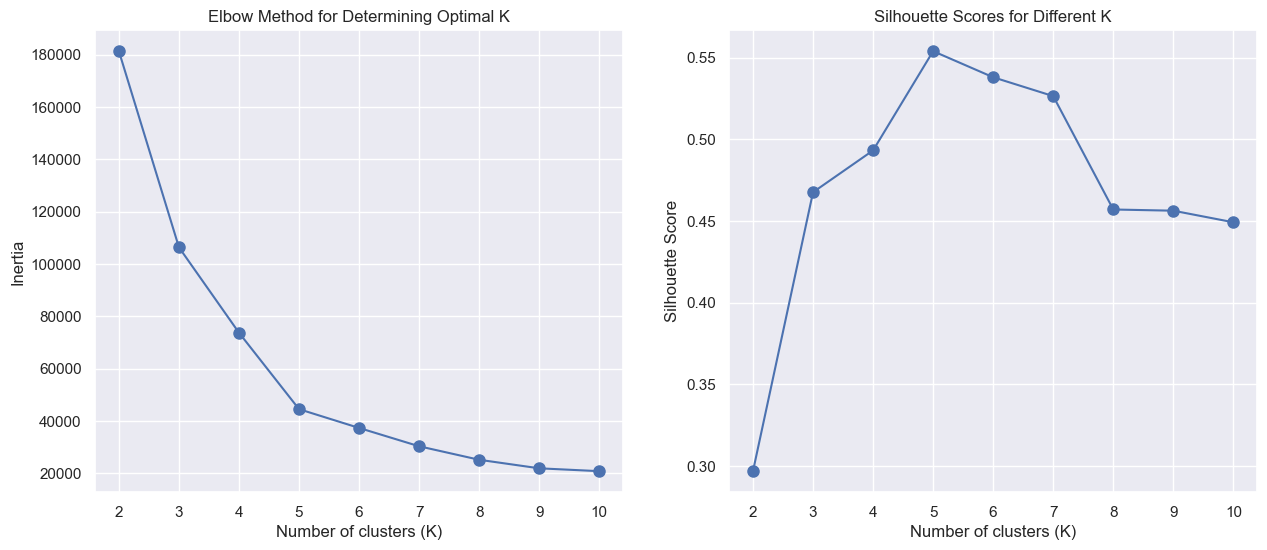

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

# Generate sample data
#X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Calculate inertia and silhouette scores for different values of K
inertia = []
silhouette_scores = []
K_range = range(2, 11)  # Silhouette score is undefined for K=1

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    inertia.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# Plot the elbow curve
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.plot(K_range, inertia, 'bo-', markersize=8)
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Determining Optimal K')
plt.grid(True)

# Plot the silhouette scores
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, 'bo-', markersize=8)
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different K')
plt.grid(True)

plt.show()


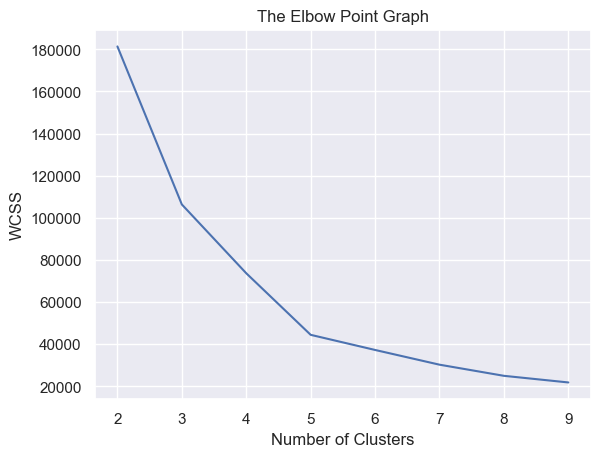

In [25]:
#plot the elbow curve

plt.plot(range(2,10), wcss[0:8])
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()  #display the plot

**Optimum Number of Clusters = 5**

**Training the k-Means Clustering Model**

In [26]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++')

kmeans.fit(X)   #creating the clusters
Y = kmeans.predict(X)   #predict the cluster number for each data point

In [27]:
Y  #output

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 1,
       0, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 3, 1, 3, 2, 3, 2, 3,
       1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

In [30]:
output = pd.DataFrame(Y, columns = ['Cluster Number']) # Convert Y to a dataframe with column name 'Cluster Number'

In [31]:
output #inspect the new data frame

,Cluster Number
0,0
1,4
2,0
3,4
4,0
...,...
195,3
196,2
197,3
198,2


In [32]:
final_data = pd.concat([customer_data, output], axis = 1) #Add Y to the dinitial customer dataframe to segment the customers into 5 segments based on the prediction

In [39]:
final_data #You can use the final data to perform prediction of future customer segments as we now have the target column Cluster Number

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster Number
0,1,Male,19,15,39,0
1,2,Male,21,15,81,4
2,3,Female,20,16,6,0
3,4,Female,23,16,77,4
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,2
197,198,Male,32,126,74,3
198,199,Male,32,137,18,2


In [34]:
grp = final_data.groupby('Cluster Number') #Group customers by segment

In [35]:
grp.groups #inspect the customer groupings

{0: [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44], 1: [43, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 126, 132, 142], 2: [124, 128, 130, 134, 136, 138, 140, 144, 146, 148, 150, 152, 154, 156, 158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180, 182, 184, 186, 188, 190, 192, 194, 196, 198], 3: [123, 125, 127, 129, 131, 133, 135, 137, 139, 141, 143, 145, 147, 149, 151, 153, 155, 157, 159, 161, 163, 165, 167, 169, 171, 173, 175, 177, 179, 181, 183, 185, 187, 189, 191, 193, 195, 197, 199], 4: [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 45]}

In [37]:
#all the rows of data of Cluster 0 is selected
cluster1 = grp.get_group(0)
cluster1

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster Number
0,1,Male,19,15,39,0
2,3,Female,20,16,6,0
4,5,Female,31,17,40,0
6,7,Female,35,18,6,0
8,9,Male,64,19,3,0
10,11,Male,67,19,14,0
12,13,Female,58,20,15,0
14,15,Male,37,20,13,0
16,17,Female,35,21,35,0
18,19,Male,52,23,29,0


5 Clusters -  0, 1, 2, 3, 4

**Visualizing all the Clusters**

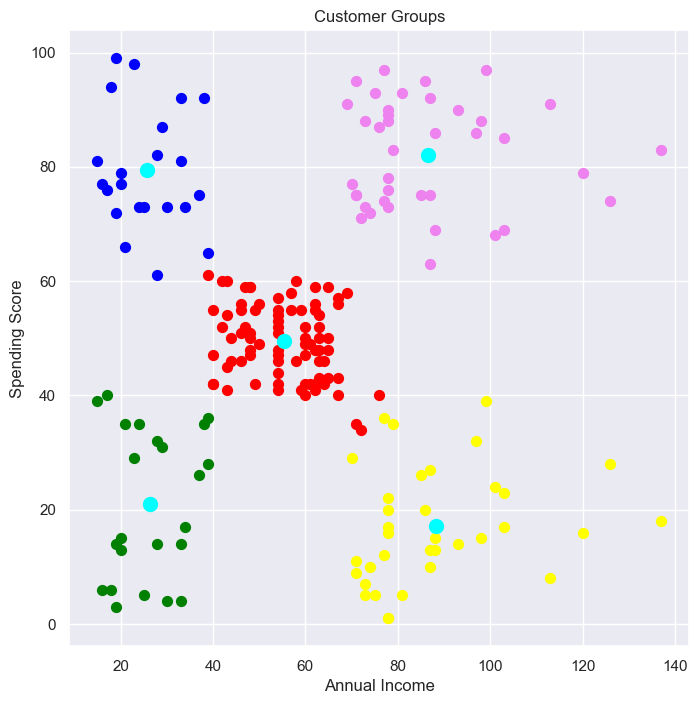

In [38]:
# plotting all the clusters and their Centroids

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()